
# Handwritten Digit Classification
This notebook demonstrates the process of using machine learning to classify handwritten digits. We will use the popular scikit-learn library to load a dataset, preprocess the data, train a model, and evaluate its performance.

## Overview
1. **Import Libraries**: Necessary libraries and modules are imported.
2. **Load Dataset**: The dataset of handwritten digits is loaded.
3. **Data Preprocessing**: Images are processed and prepared for the model.
4. **Model Training and Evaluation**: A machine learning model is trained and evaluated.



### Import Libraries
First, we import all the necessary libraries. `matplotlib` is used for data visualization, and various modules from `sklearn` are used for machine learning tasks.

In [15]:
# Import necessary libraries such as matplotlib for plotting and sklearn for machine learning tasks. This sets up our environment for data handling and visualization.
# Import necessary libraries for data handling and visualization.
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics, ensemble,tree,linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import cv2

### Load the Dataset
Here, we load the dataset of handwritten digits from `sklearn`. This dataset is widely used for training and testing in the field of machine learning for image classification.

In [16]:
# Load the dataset of handwritten digits from sklearn. This dataset contains images of handwritten digits along with their corresponding labels, and is commonly used for training and testing image classification models.
# Load the dataset of handwritten digits.
data = datasets.load_digits()

### Image Data Processing
This cell processes the image data to ensure it's in the right format for our analysis, which is a crucial step in preparing the data for machine learning models.

In [17]:
# Process the image data to ensure it's in the right format for analysis. Image processing is crucial as it transforms raw data into a suitable format for machine learning models.
# Process the image data for analysis.
image_ds  = []
for img in data.images:
    res = cv2.resize(img, dsize=(12, 12))
    res = res/16
    image_ds.append(res)

### Display an Example Image
To understand the data better, we display an example image from the dataset. This helps us visually verify the nature of the handwritten digits we are working with.

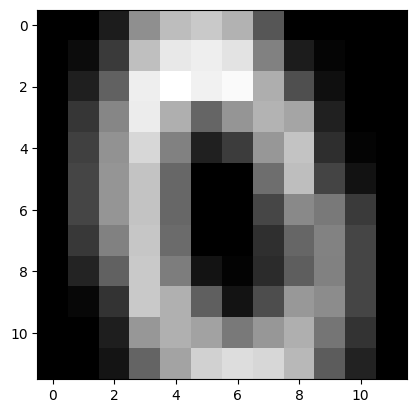

In [18]:
# Display an example digit image from the dataset. Visualizing the data helps in understanding the kind of images we are dealing with and the complexity of the classification task.
# Display an example digit image from the dataset.
plt.imshow((image_ds[78]),cmap='gray')

### Data Preprocessing for Model Input
In this step, we convert the image data into a flattened array, which is a required format for feeding the data into most machine learning models.

In [19]:
# Convert image data to a flat array to prepare it for input into the machine learning model. Flattening the image data is a common preprocessing step before feeding it into a classification algorithm.
# Convert image data to a flat array and prepare for model input.
img_data = np.asarray(image_ds)
flattened_data = img_data.reshape((len(image_ds), -1))
X_train, X_test, y_train, y_test = train_test_split(
    flattened_data, data.target, test_size=0.4, shuffle=False
)


### Importing Machine Learning Model
We import `LinearSVC` from `sklearn` for the classification task and other necessary tools for splitting the data into training and test sets.

In [21]:
# Import LinearSVC for classification and train/test split for evaluation. LinearSVC is a type of Support Vector Machine that works well for classifying high-dimensional data like images.
# Import LinearSVC for classification and train/test split for evaluation.
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'max_iter': [1000, 5000, 10000],  # Maximum number of iterations to converge
    'tol': [1e-4, 1e-3, 1e-2]  # Tolerance for stopping criteria
}

# Create a GridSearchCV object
grid_search = GridSearchCV(LinearSVC(), param_grid, refit=True, verbose=3, cv=5)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Print out the best parameters
print("Best Parameters:", grid_search.best_params_)

# Make predictions with the best estimator
best_linear_svc = grid_search.best_estimator_
predicted = best_linear_svc.predict(X_test)

# Generate the classification report
linear_svc_report = metrics.classification_report(y_test, predicted)
print("LinearSVC Classification Report with Hyperparameter Tuning:")
print(linear_svc_report)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END .C=0.01, max_iter=1000, tol=0.0001;, score=0.880 total time=   0.0s
[CV 2/5] END .C=0.01, max_iter=1000, tol=0.0001;, score=0.958 total time=   0.0s
[CV 3/5] END .C=0.01, max_iter=1000, tol=0.0001;, score=0.903 total time=   0.0s
[CV 4/5] END .C=0.01, max_iter=1000, tol=0.0001;, score=0.884 total time=   0.0s
[CV 5/5] END .C=0.01, max_iter=1000, tol=0.0001;, score=0.944 total time=   0.0s
[CV 1/5] END ..C=0.01, max_iter=1000, tol=0.001;, score=0.880 total time=   0.0s
[CV 2/5] END ..C=0.01, max_iter=1000, tol=0.001;, score=0.958 total time=   0.0s
[CV 3/5] END ..C=0.01, max_iter=1000, tol=0.001;, score=0.903 total time=   0.0s
[CV 4/5] END ..C=0.01, max_iter=1000, tol=0.001;, score=0.884 total time=   0.0s
[CV 5/5] END ..C=0.01, max_iter=1000, tol=0.001;, score=0.944 total time=   0.0s
[CV 1/5] END ...C=0.01, max_iter=1000, tol=0.01;, score=0.880 total time=   0.0s
[CV 2/5] END ...C=0.01, max_iter=1000, tol=0.01

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ...C=10, max_iter=1000, tol=0.0001;, score=0.903 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ...C=10, max_iter=1000, tol=0.0001;, score=0.949 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ...C=10, max_iter=1000, tol=0.0001;, score=0.921 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ...C=10, max_iter=1000, tol=0.0001;, score=0.912 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ...C=10, max_iter=1000, tol=0.0001;, score=0.963 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ....C=10, max_iter=1000, tol=0.001;, score=0.903 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ....C=10, max_iter=1000, tol=0.001;, score=0.949 total time=   0.2s
[CV 3/5] END ....C=10, max_iter=1000, tol=0.001;, score=0.921 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ....C=10, max_iter=1000, tol=0.001;, score=0.912 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ....C=10, max_iter=1000, tol=0.001;, score=0.963 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END .....C=10, max_iter=1000, tol=0.01;, score=0.903 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END .....C=10, max_iter=1000, tol=0.01;, score=0.949 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END .....C=10, max_iter=1000, tol=0.01;, score=0.921 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END .....C=10, max_iter=1000, tol=0.01;, score=0.907 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END .....C=10, max_iter=1000, tol=0.01;, score=0.967 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ...C=10, max_iter=5000, tol=0.0001;, score=0.903 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ...C=10, max_iter=5000, tol=0.0001;, score=0.949 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ...C=10, max_iter=5000, tol=0.0001;, score=0.921 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ...C=10, max_iter=5000, tol=0.0001;, score=0.907 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ...C=10, max_iter=5000, tol=0.0001;, score=0.963 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ....C=10, max_iter=5000, tol=0.001;, score=0.903 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ....C=10, max_iter=5000, tol=0.001;, score=0.949 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ....C=10, max_iter=5000, tol=0.001;, score=0.921 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ....C=10, max_iter=5000, tol=0.001;, score=0.907 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ....C=10, max_iter=5000, tol=0.001;, score=0.963 total time=   1.8s
[CV 1/5] END .....C=10, max_iter=5000, tol=0.01;, score=0.903 total time=   1.2s
[CV 2/5] END .....C=10, max_iter=5000, tol=0.01;, score=0.949 total time=   1.8s
[CV 3/5] END .....C=10, max_iter=5000, tol=0.01;, score=0.921 total time=   1.1s
[CV 4/5] END .....C=10, max_iter=5000, tol=0.01;, score=0.907 total time=   0.6s
[CV 5/5] END .....C=10, max_iter=5000, tol=0.01;, score=0.963 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ..C=10, max_iter=10000, tol=0.0001;, score=0.903 total time=   1.9s
[CV 2/5] END ..C=10, max_iter=10000, tol=0.0001;, score=0.949 total time=   1.6s
[CV 3/5] END ..C=10, max_iter=10000, tol=0.0001;, score=0.921 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ..C=10, max_iter=10000, tol=0.0001;, score=0.907 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ..C=10, max_iter=10000, tol=0.0001;, score=0.963 total time=   1.7s
[CV 1/5] END ...C=10, max_iter=10000, tol=0.001;, score=0.903 total time=   1.0s
[CV 2/5] END ...C=10, max_iter=10000, tol=0.001;, score=0.949 total time=   1.3s
[CV 3/5] END ...C=10, max_iter=10000, tol=0.001;, score=0.921 total time=   0.7s
[CV 4/5] END ...C=10, max_iter=10000, tol=0.001;, score=0.907 total time=   0.8s
[CV 5/5] END ...C=10, max_iter=10000, tol=0.001;, score=0.963 total time=   0.9s
[CV 1/5] END ....C=10, max_iter=10000, tol=0.01;, score=0.903 total time=   0.5s
[CV 2/5] END ....C=10, max_iter=10000, tol=0.01;, score=0.949 total time=   0.5s
[CV 3/5] END ....C=10, max_iter=10000, tol=0.01;, score=0.921 total time=   0.4s
[CV 4/5] END ....C=10, max_iter=10000, tol=0.01;, score=0.907 total time=   0.4s
[CV 5/5] END ....C=10, max_iter=10000, tol=0.01;, score=0.963 total time=   0.5s
[CV 1/5] END ..C=100, max_iter=1000, tol=0.0001;, score=0.898 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ..C=100, max_iter=1000, tol=0.0001;, score=0.940 total time=   0.2s
[CV 3/5] END ..C=100, max_iter=1000, tol=0.0001;, score=0.921 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ..C=100, max_iter=1000, tol=0.0001;, score=0.902 total time=   0.2s
[CV 5/5] END ..C=100, max_iter=1000, tol=0.0001;, score=0.963 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ...C=100, max_iter=1000, tol=0.001;, score=0.889 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ...C=100, max_iter=1000, tol=0.001;, score=0.931 total time=   0.2s
[CV 3/5] END ...C=100, max_iter=1000, tol=0.001;, score=0.921 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ...C=100, max_iter=1000, tol=0.001;, score=0.912 total time=   0.2s
[CV 5/5] END ...C=100, max_iter=1000, tol=0.001;, score=0.958 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ....C=100, max_iter=1000, tol=0.01;, score=0.898 total time=   0.2s
[CV 2/5] END ....C=100, max_iter=1000, tol=0.01;, score=0.940 total time=   0.2s
[CV 3/5] END ....C=100, max_iter=1000, tol=0.01;, score=0.921 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ....C=100, max_iter=1000, tol=0.01;, score=0.912 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ....C=100, max_iter=1000, tol=0.01;, score=0.953 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ..C=100, max_iter=5000, tol=0.0001;, score=0.894 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ..C=100, max_iter=5000, tol=0.0001;, score=0.935 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ..C=100, max_iter=5000, tol=0.0001;, score=0.912 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ..C=100, max_iter=5000, tol=0.0001;, score=0.893 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ..C=100, max_iter=5000, tol=0.0001;, score=0.958 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ...C=100, max_iter=5000, tol=0.001;, score=0.894 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ...C=100, max_iter=5000, tol=0.001;, score=0.935 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ...C=100, max_iter=5000, tol=0.001;, score=0.917 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ...C=100, max_iter=5000, tol=0.001;, score=0.893 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ...C=100, max_iter=5000, tol=0.001;, score=0.953 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ....C=100, max_iter=5000, tol=0.01;, score=0.889 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ....C=100, max_iter=5000, tol=0.01;, score=0.935 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ....C=100, max_iter=5000, tol=0.01;, score=0.917 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ....C=100, max_iter=5000, tol=0.01;, score=0.893 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ....C=100, max_iter=5000, tol=0.01;, score=0.949 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END .C=100, max_iter=10000, tol=0.0001;, score=0.894 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END .C=100, max_iter=10000, tol=0.0001;, score=0.935 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END .C=100, max_iter=10000, tol=0.0001;, score=0.917 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END .C=100, max_iter=10000, tol=0.0001;, score=0.893 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END .C=100, max_iter=10000, tol=0.0001;, score=0.953 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ..C=100, max_iter=10000, tol=0.001;, score=0.894 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ..C=100, max_iter=10000, tol=0.001;, score=0.935 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ..C=100, max_iter=10000, tol=0.001;, score=0.917 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ..C=100, max_iter=10000, tol=0.001;, score=0.893 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ..C=100, max_iter=10000, tol=0.001;, score=0.958 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ...C=100, max_iter=10000, tol=0.01;, score=0.889 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ...C=100, max_iter=10000, tol=0.01;, score=0.935 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ...C=100, max_iter=10000, tol=0.01;, score=0.917 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ...C=100, max_iter=10000, tol=0.01;, score=0.893 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ...C=100, max_iter=10000, tol=0.01;, score=0.958 total time=   0.6s
Best Parameters: {'C': 1, 'max_iter': 1000, 'tol': 0.0001}
LinearSVC Classification Report with Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.90      0.85      0.87        73
           2       1.00      1.00      1.00        71
           3       0.95      0.81      0.88        74
           4       0.97      0.93      0.95        74
           5       0.88      0.99      0.93        71
           6       0.95      0.99      0.97        74
           7       0.95      0.96      0.95        72
           8       0.87      0.90      0.88        68
           9       0.84      0.87      0.86        71

    accuracy                           0.92       719
   macro avg       0.93      0.93      0.92       719
weighted avg       0.93      0.92      0.92       719



### Visualize Test Image
Here, we display a test image for visual verification, which helps in understanding how the model will interpret images.

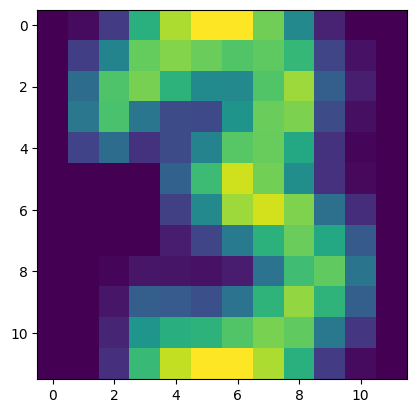

Predicted : 3


In [22]:
# Display a test image for visual verification. This helps in understanding how the model will interpret new, unseen data.
# Display a test image for visual verification.
plt.imshow(X_test[12].reshape((12,12)))
plt.show()
print("Predicted : " + str(predicted[12]))

### Prepare Data for Model Predictions
This cell appears to prepare an array for model predictions, a step typically used for formatting the output of the model.

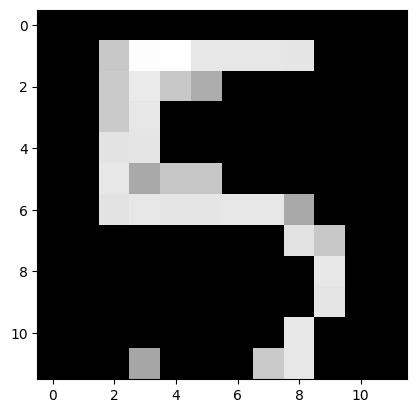

Prediction : 5


In [23]:
# Prepare an array for model predictions. This step is typically used to format or preallocate space for model outputs.
# Prepare an array for model predictions (details unclear without more context).
arr = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.648438, 0.820313, 0.828125, 0.75, 0.75, 0.75, 0.742188, 0, 0, 0, 0, 0, 0.65625, 0.757813, 0.648438, 0.5625, 0, 0, 0, 0, 0, 0, 0, 0, 0.65625, 0.75, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.734375, 0.742188, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.75, 0.546875, 0.640625, 0.640625, 0, 0, 0, 0, 0, 0, 0, 0, 0.734375, 0.75, 0.742188, 0.742188, 0.75, 0.75, 0.546875, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.734375, 0.648438, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.75, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.742188, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.75, 0, 0, 0, 0, 0, 0, 0.539063, 0, 0, 0, 0.65625, 0.75, 0, 0, 0]
b = np.asarray(arr).reshape((12,12))
plt.imshow(b,cmap='gray')
plt.show()
print('Prediction : ' + str(clf.predict([arr])[0]))

### Install and Import Model Conversion Tool
In this cell, we install and import `m2cgen`, a tool used for converting machine learning models into native code for various applications.

In [25]:
# Install and import m2cgen for model conversion. This is used for converting machine learning models into a native code (like C, Java, or others) for various applications.
# Install and import m2cgen for model conversion.
!pip install m2cgen
import m2cgen as m2c
import numpy as np
import sys
sys.setrecursionlimit(2147483647)
code = m2c.export_to_python(clf)
with open('svm.py', 'w') as f:
    f.write(code)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 1.7 MB/s eta 0:00:00


### Install Python Minimizer
Finally, we install `python-minimizer`, which is useful for optimization tasks in machine learning, such as parameter tuning and model optimization.

In [26]:
# Install python-minimizer for optimization tasks. This library is helpful in optimizing model parameters or other optimization tasks within the machine learning workflow.
# Install python-minimizer for optimization tasks.
!pip install python-minimizer

In [27]:
!python-minimizer svm.py -o svm_min.py
!ls -alh svm_min.py

-rw-r--r-- 1 root root 43K Dec  2 05:17 svm_min.py


The following models have been developed to evaluate the accuracy within this dataset. However, they have not been utilized due to their considerable size.

In [28]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# from sklearn import metrics

# # Define the parameter grid to search
# param_grid = {
#     'C': [0.1, 1, 10, 100],  # Regularization parameter
#     'gamma': ['scale', 'auto'],  # Kernel coefficient
#     'kernel': ['rbf', 'linear', 'poly', 'sigmoid']  # Type of kernel
# }

# # Create a GridSearchCV object
# grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=5)

# # Fit the model on the training data
# grid_search.fit(X_train, y_train)

# # Print out the best parameters
# print("Best Parameters:", grid_search.best_params_)

# # Make predictions with the best estimator
# best_svc = grid_search.best_estimator_
# svc_predicted = best_svc.predict(X_test)

# # Generate the classification report
# svc_report = metrics.classification_report(y_test, svc_predicted)
# print("SVC Classification Report with Hyperparameter Tuning:")
# print(svc_report)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.843 total time=   0.4s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.963 total time=   0.1s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.875 total time=   0.2s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.898 total time=   0.4s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.926 total time=   0.4s
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.889 total time=   0.1s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.972 total time=   0.1s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.954 total time=   0.1s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.935 total time=   0.1s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.986 total time=   0.2s
[CV 1/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.889 total time=   0.1s
[CV 2/5] END ...C=0.1, gamma=scale, kernel=poly

In [29]:
# sys.setrecursionlimit(2147483647)
# code = m2c.export_to_python(best_svc)
# with open('best_svc.py', 'w') as f:
#     f.write(code)

In [31]:
# !python-minimizer best_svc.py -o best_svc_min.py
# !ls -alh svm_min.py

-rw-r--r-- 1 root root 43K Dec  2 05:17 svm_min.py


In [37]:
# from sklearn.ensemble import ExtraTreesClassifier

# # Initialize the ExtraTreesClassifier model
# extra_trees_model = ExtraTreesClassifier()

# # Train the ExtraTreesClassifier model
# extra_trees_model.fit(X_train, y_train)

# # Make predictions with the ExtraTreesClassifier model
# extra_trees_predicted = extra_trees_model.predict(X_test)

# # Generate the classification report for the ExtraTreesClassifier model
# extra_trees_report = metrics.classification_report(y_test, extra_trees_predicted)

# print("ExtraTreesClassifier Classification Report:")
# print(extra_trees_report)


ExtraTreesClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.95      0.85      0.90        73
           2       1.00      0.93      0.96        71
           3       0.91      0.82      0.87        74
           4       0.97      0.95      0.96        74
           5       0.89      0.96      0.93        71
           6       0.97      1.00      0.99        74
           7       0.95      0.99      0.97        72
           8       0.90      0.93      0.91        68
           9       0.84      0.96      0.89        71

    accuracy                           0.94       719
   macro avg       0.94      0.94      0.94       719
weighted avg       0.94      0.94      0.94       719



In [38]:
# sys.setrecursionlimit(2147483647)
# code = m2c.export_to_python(extra_trees_model)
# with open('extra_trees_model.py', 'w') as f:
#     f.write(code)

# !python-minimizer extra_trees_model.py -o extra_trees_model_min.py
# !ls -alh svm_min.py

-rw-r--r-- 1 root root 43K Dec  2 05:17 svm_min.py
